We are going to perform EDA + Model formation of a Wine.csv dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("WineQt.csv")


print(df.shape) # We have 13 columns and 1143 instances of them
df.head()#to show the top 5 instances
# Quality features is our target variable else are my Independent Features(0-10)


(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


The WineQt.csv file has 1143 instances of data and 13 features , out of which Quality is the target(dependent) features and else are independent features on which the quality of wine depends

In [3]:
print(df.columns)
df.describe()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


df.columns displays all the coloumns(Features of the dataset) and df.describe give a short summary of the dataset 

In [4]:
df.isnull().sum() # Check for NaN Values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

df.isnull.sum helps us to get the info of null/NaN values in the dataframe.Since the sum is 0 for all the features i.e we dont have any null values in our Dataframe.And in the dataframe we have all the numerical features , no Categorical variable

In [5]:
df.corr().sort_values("quality")["quality"]

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

df.corr() give displays the correlation(the dependence between two variables) matrix . 2 Variables have correlation in the range [-1,1] .Correlation values depicts the relation/dependence of 2 variables . 
If the corr value is close to 1 , it means they are almost directly proportional while if the value is close to 0 , it mean they aren't dependent on each other and corr value close to -1 depicts they are inversely proportional to each other .

Since we are seeing the correlation of target variable ("Quality of wine") with all other independent variables So correlation values close to 0 i.e [-0.1,0.1] are not correlated so we can drop them .

In [6]:
import numpy as np
col_rem = pd.Series(np.abs((df.corr()["quality"])) <=0.1) # Get the columns having corr in range [-0.1,0.1]
Col_to_remove = col_rem.loc[col_rem].index
# print(X_val.shape)
df.drop(columns = Col_to_remove,inplace=True) #Applying the drop 
print(df.shape)

(1143, 9)


After removing those unwanted columns we are limited with only 9 key features which defines the quality of Wine.

<AxesSubplot:>

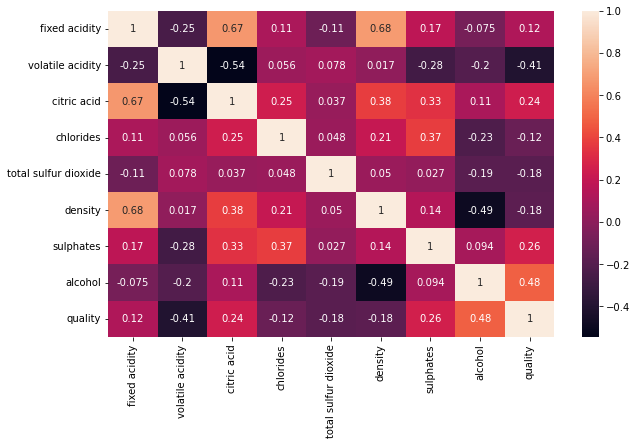

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)



## length(1000) with, no oo bed(2,3) 




Heatmap above show a colurful representation of correlation matrix of features with each other.the Correlation values defines the intensity of colur of cells.Correlation closer to 1 will be lighter while correlation closer to -1 will be darker.          
Some inferences can be gathered from the above map like Alcohol is lighter than water , thus adding alcohol decreases the density of Wine.

<AxesSubplot:>

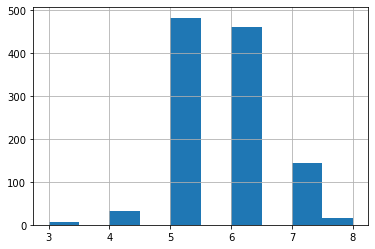

In [8]:
Y = df['quality'].value_counts()
Labels = np.sort(df['quality'].unique())
df['quality'].hist()

Wine is graded by its quality which ranges from (1,10). But our data is highly imbalanced(wines of quality score (1,2,9,10) are not even present). Our Machine Learning is supposed to  get heaviy biased on prediction.

## Machine Learning Algorithms to train the Models and make predictions

In [16]:
# Seperating out our independent and dependent features
y = df[["quality"]]
print("The Percentage of categories are :")
print(y.value_counts()*100/(y.value_counts().sum()))
print(Y.value_counts().index)

The Percentage of categories are :
quality
5          42.257218
6          40.419948
7          12.510936
4           2.887139
8           1.399825
3           0.524934
dtype: float64
Int64Index([483, 462, 143, 33, 16, 6], dtype='int64')


Most of the features are scaled in different units.Many algorithms which uses distance as a parameter for computation(KNN, SVM) will get biased to the features having higher numerical values. One way to avoid this is to scale all the features to the same unit. Sklearn is a python Module which provide a tool named StandardScaler which will change the distribution of features to Gaussian Distribution(mean = 0, Std Deviation = 1).

In [17]:
from sklearn.preprocessing import StandardScaler  #importing from sklearn
scaler = StandardScaler() #  Creating an instance of it.
X = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
X.drop(columns =["quality"],inplace=True)
X.head()  # My independent variables 

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.231395,-0.363610,0.555854,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.234247,0.643477,0.036165,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,0.107253,0.246745,0.140103,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.252560,0.429852,0.659792,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.231395,-0.363610,0.555854,-0.573658,-0.963382


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier


Importing list of Machine Learning Algorithms for building a predictive Model.
Its a classification problem where our model have to predict the quality of wine based on the independent variables


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape)

(765, 8) (378, 8) (765, 1)


In [20]:
print(Labels)

[3 4 5 6 7 8]


Splliting the dataset into 2 parts :                                                                                                  
    1. First part for training our model where it will be introduced with the data and the label of them . This type of learning is called Supervised Machine Learning . The Model is fed with lots of instances of data , with there labels , model learns the pattern and reveals the hidden insights from data .                                                                                                               
    2. The testing data , Once our model has been trained , how it will perform in the market can be evaluated using this test data by checking its accuracy of prediction on them as  our model hasnt seen this data prior .

In [21]:
score = [] # for storing the results of each model
from math import *
def ModelFormation(name,model,X_train,X_test,y_train,y_test):  
    model.fit(X_train,y_train)
    print("{}'s Score is :{}".format(name,model.score(X_test,y_test)))
    score.append(round(model.score(X_test,y_test),4)*100)

    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred,zero_division=0))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Labels)
    disp.plot()
    plt.show()
    print("/*****************************************************************/")


"Modelformation" function to take input the training data and the ML algorithm to be used for training , will train the model , store the predictions and create a confusion matrix and a classification reportcard.                                            
Confusion matrix is a matrix where Row shows the true label(The ACTUAL CLASS of that instance of data) and column shows the predicted label(WHAT LABEL OUR MODEL PREDICTED to that instance)

In [22]:
### The Hyperparameter is tuned using GridSearchCv


nbGauss = GaussianNB()  ### Naive Bayes Algorithm for training
svc_lin = LinearSVC(C=10)## Linaer Support Vector Machine
svc = SVC(C=1, degree=0, gamma=0.1,probability=True)### Support Vector Machine with kernel as "RBF"
knn = KNeighborsClassifier(n_neighbors=8) ## K NearestNeighbour Classfier
rfc= RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=10)  ###Random Forest Classifier with 50 decision trees
extra_tree = BaggingClassifier(ExtraTreesClassifier(random_state=0), random_state=0) ### 
gradboost= GradientBoostingClassifier(n_estimators=150, learning_rate=0.2,max_depth=1, random_state=0)


In [23]:
Models = {
    "LinearSVC":svc_lin,
    "Gaussian Naive Bayes":nbGauss,
    "RBF Kernel SVC":svc,
    "K Nearest Neighbour":knn,
    "Random Forest Classifier":rfc,
    "Extra Tree Classifier":extra_tree,
    "Gradient Boosting":gradboost
}

C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Param\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC's Score is :0.6031746031746031
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.82      0.74       160
           6       0.56      0.61      0.58       153
           7       0.20      0.04      0.07        47
           8       0.00      0.00      0.00         5

    accuracy                           0.60       378
   macro avg       0.24      0.25      0.23       378
weighted avg       0.53      0.60      0.56       378



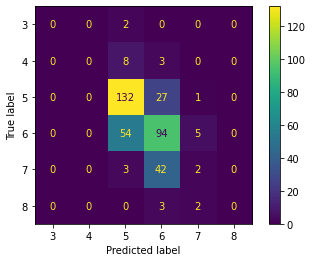

/*****************************************************************/
Gaussian Naive Bayes's Score is :0.5793650793650794
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.71      0.71       160
           6       0.58      0.54      0.56       153
           7       0.40      0.47      0.43        47
           8       0.08      0.20      0.12         5

    accuracy                           0.58       378
   macro avg       0.29      0.32      0.30       378
weighted avg       0.58      0.58      0.58       378



C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


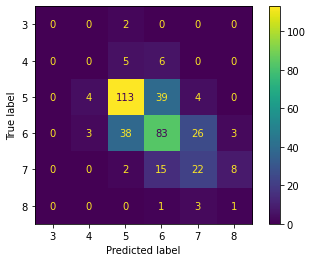

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RBF Kernel SVC's Score is :0.6455026455026455
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.81      0.75       160
           6       0.60      0.66      0.63       153
           7       0.52      0.30      0.38        47
           8       0.00      0.00      0.00         5

    accuracy                           0.65       378
   macro avg       0.30      0.29      0.29       378
weighted avg       0.61      0.65      0.62       378



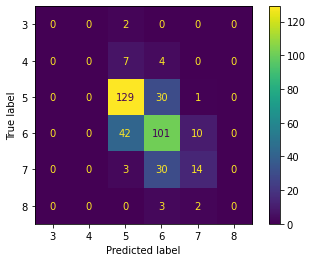

/*****************************************************************/
K Nearest Neighbour's Score is :0.6137566137566137
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.75      0.71       160
           6       0.59      0.63      0.61       153
           7       0.44      0.32      0.37        47
           8       0.00      0.00      0.00         5

    accuracy                           0.61       378
   macro avg       0.28      0.28      0.28       378
weighted avg       0.58      0.61      0.59       378



C:\Users\Param\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


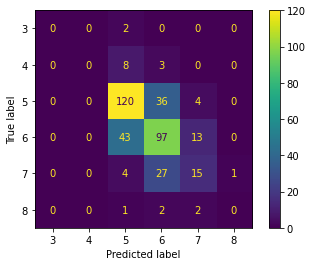

/*****************************************************************/


C:\Users\Param\AppData\Local\Temp/ipykernel_5568/1616640086.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random Forest Classifier's Score is :0.6851851851851852
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.81      0.76       160
           6       0.66      0.71      0.68       153
           7       0.61      0.43      0.50        47
           8       1.00      0.20      0.33         5

    accuracy                           0.69       378
   macro avg       0.50      0.36      0.38       378
weighted avg       0.66      0.69      0.67       378



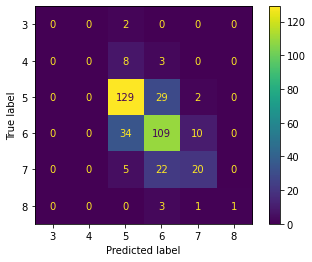

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Extra Tree Classifier's Score is :0.6772486772486772
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.81      0.77       160
           6       0.64      0.69      0.66       153
           7       0.58      0.40      0.48        47
           8       1.00      0.20      0.33         5

    accuracy                           0.68       378
   macro avg       0.49      0.35      0.37       378
weighted avg       0.65      0.68      0.66       378



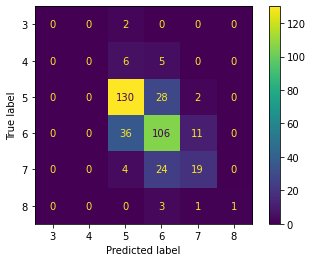

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting's Score is :0.6375661375661376
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.79      0.74       160
           6       0.62      0.62      0.62       153
           7       0.51      0.40      0.45        47
           8       0.00      0.00      0.00         5

    accuracy                           0.64       378
   macro avg       0.30      0.30      0.30       378
weighted avg       0.61      0.64      0.62       378



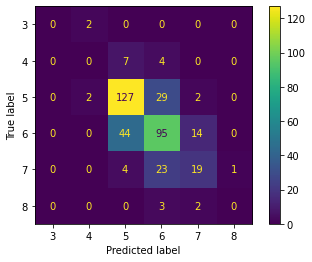

/*****************************************************************/


In [68]:
# print(Models[x].__class__.__name__) #to print the name of algo
for x in Models:
        ModelFormation(x,Models[x],X_train,X_test,y_train,y_test)

Expect Result , Our Model is Baised in prediction of (3,4 8) class . None of the model had predicted thses correctly,  which arises due to Imbalance in Dataset.

The Parameter in classification reports are :

       1.Precision is among all the labels where our model predicted true ,how many(among those) were actual true e.g our model predicted class 5, 100 times and only 50 of them were actually class 5 , so precision will be 50/100.
       
       2 .Recall is among all the true labels , how many times our model detected them as true correctly e.g there are 60              instances of class 5 and our model(among these 60) predicted only 40 times as class 5 , so recall will be 40/60  
       
       3.F1 score is the harmonic mean of precision and recall.In many cases the measure the measure of precision and recall are equally important , so F1 score provide the better measure to analyse them .
       
       4 Support is the no of instance of that  label in y_test(target column in testing data)

C:\Users\Param\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Param\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Voting Classifier's Score is :0.6534391534391535
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.80      0.75       160
           6       0.62      0.65      0.63       153
           7       0.53      0.40      0.46        47
           8       0.00      0.00      0.00         5

    accuracy                           0.65       378
   macro avg       0.31      0.31      0.31       378
weighted avg       0.62      0.65      0.63       378



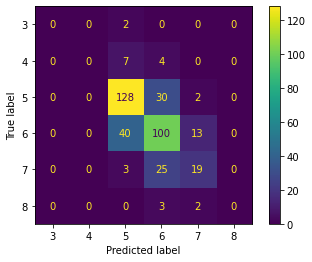

/*****************************************************************/


In [69]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('nb',nbGauss),('svc',svc),('knn',knn),("rfc",rfc),("etc",extra_tree),("gbc",gradboost)],
                             voting="soft")
ModelFormation("Voting Classifier",voting_clf,X_train,X_test,y_train,y_test)


Like we humans while making a decision , usually take suggestions from our friends and colleagues , then came to a final conclusion regarding that decision. In the Similar fashion "Voting Classfier " algorithm take the majority(or mean of probability) vote from all the above classfiers(models) and then makes a prediction on each instances based on the majority votes ,which often outperforms compare to  the best model's prediction because of the " WISDOM OF THE CROWD"

### Handling the imbalanced dataset
    Since we saw that our models accuracy was immensely affected because of imbalance dataset . TO Overcome this situation       we can create some artificial instances of minorities classes using SMOTE technique. This methos is called Oversampling

In [70]:
print("The Distribution of target Variables before Oversampling :\n", y_train.value_counts())

The Distribution of target Variables before Oversampling :
 quality
5          323
6          309
7           96
4           22
8           11
3            4
dtype: int64


In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20,k_neighbors=3, n_jobs=-1)
X_smote,Y_smote = sm.fit_resample(X,y)
print("The Distribution of target Variables after Oversampling :\n",Y_smote.value_counts())

The Distribution of target Variables after Oversampling :
 quality
3          483
4          483
5          483
6          483
7          483
8          483
dtype: int64


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,Y_smote, test_size=0.33, random_state=42,stratify=Y_smote)
print(X_train.shape,X_test.shape,y_train.shape)

(1941, 8) (957, 8) (1941, 1)


Repeating the same process of training the Models on new OverSampled Data

C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Param\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC's Score is :0.5799373040752351
              precision    recall  f1-score   support

           3       0.82      1.00      0.90       159
           4       0.56      0.48      0.52       159
           5       0.51      0.57      0.54       160
           6       0.36      0.17      0.23       160
           7       0.49      0.37      0.42       160
           8       0.57      0.89      0.69       159

    accuracy                           0.58       957
   macro avg       0.55      0.58      0.55       957
weighted avg       0.55      0.58      0.55       957



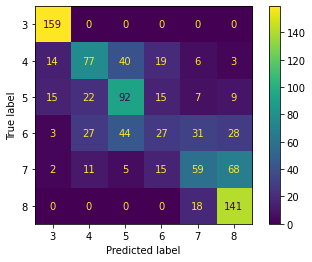

/*****************************************************************/
Gaussian Naive Bayes's Score is :0.4942528735632184
              precision    recall  f1-score   support

           3       0.47      0.82      0.60       159
           4       0.51      0.23      0.32       159
           5       0.48      0.38      0.42       160
           6       0.39      0.29      0.34       160
           7       0.46      0.37      0.41       160
           8       0.60      0.87      0.71       159

    accuracy                           0.49       957
   macro avg       0.48      0.49      0.47       957
weighted avg       0.48      0.49      0.47       957



C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


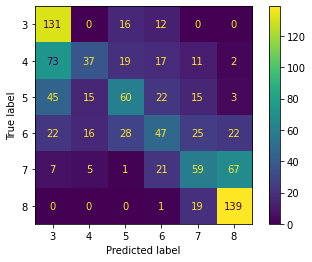

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RBF Kernel SVC's Score is :0.7136886102403344
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       159
           4       0.72      0.78      0.75       159
           5       0.60      0.56      0.58       160
           6       0.46      0.42      0.44       160
           7       0.74      0.54      0.63       160
           8       0.80      0.98      0.88       159

    accuracy                           0.71       957
   macro avg       0.70      0.71      0.70       957
weighted avg       0.70      0.71      0.70       957



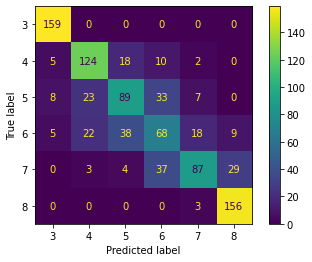

/*****************************************************************/
K Nearest Neighbour's Score is :0.7460815047021944


C:\Users\Param\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           3       0.89      1.00      0.94       159
           4       0.66      0.98      0.79       159
           5       0.66      0.44      0.53       160
           6       0.48      0.27      0.35       160
           7       0.75      0.79      0.77       160
           8       0.89      1.00      0.94       159

    accuracy                           0.75       957
   macro avg       0.72      0.75      0.72       957
weighted avg       0.72      0.75      0.72       957



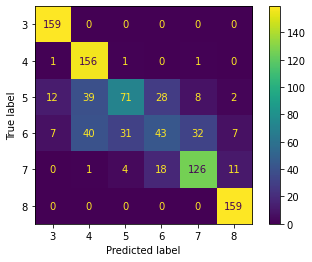

/*****************************************************************/


C:\Users\Param\AppData\Local\Temp/ipykernel_5568/1616640086.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Random Forest Classifier's Score is :0.8495297805642633
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       159
           4       0.91      0.99      0.95       159
           5       0.73      0.69      0.71       160
           6       0.63      0.56      0.59       160
           7       0.85      0.88      0.86       160
           8       0.95      0.99      0.97       159

    accuracy                           0.85       957
   macro avg       0.84      0.85      0.85       957
weighted avg       0.84      0.85      0.85       957



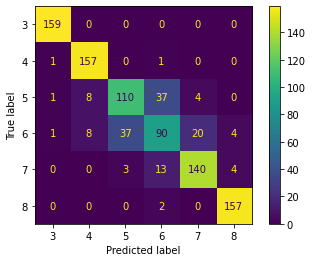

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Extra Tree Classifier's Score is :0.8505747126436781
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       159
           4       0.92      0.97      0.95       159
           5       0.73      0.65      0.69       160
           6       0.63      0.60      0.62       160
           7       0.87      0.88      0.87       160
           8       0.96      1.00      0.98       159

    accuracy                           0.85       957
   macro avg       0.84      0.85      0.85       957
weighted avg       0.84      0.85      0.85       957



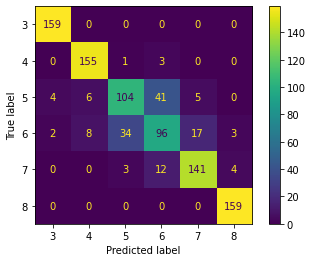

/*****************************************************************/


C:\Users\Param\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting's Score is :0.723092998955068
              precision    recall  f1-score   support

           3       0.93      0.99      0.96       159
           4       0.74      0.73      0.73       159
           5       0.61      0.57      0.59       160
           6       0.49      0.41      0.44       160
           7       0.68      0.72      0.70       160
           8       0.83      0.93      0.88       159

    accuracy                           0.72       957
   macro avg       0.71      0.72      0.72       957
weighted avg       0.71      0.72      0.72       957



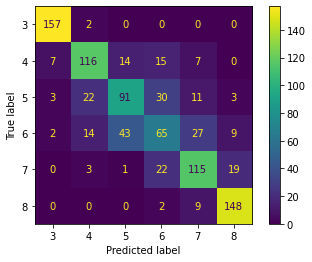

/*****************************************************************/


In [75]:
for x in Models:
    ModelFormation(x,Models[x],X_train,X_test,y_train,y_test)

C:\Users\Param\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Param\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Voting Classifier's Score is :0.8181818181818182
              precision    recall  f1-score   support

           3       0.94      1.00      0.97       159
           4       0.87      0.97      0.92       159
           5       0.72      0.64      0.68       160
           6       0.62      0.49      0.55       160
           7       0.79      0.81      0.80       160
           8       0.89      1.00      0.94       159

    accuracy                           0.82       957
   macro avg       0.81      0.82      0.81       957
weighted avg       0.81      0.82      0.81       957



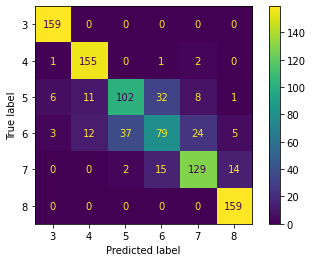

/*****************************************************************/


In [76]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('nb',nbGauss),('svc',svc),('knn',knn),("rfc",rfc),("etc",extra_tree),("gbc",gradboost)],
                             voting="soft")
ModelFormation("Voting Classifier",voting_clf,X_train,X_test,y_train,y_test)


### The Reportcard of Above Machine Learning Models 

In [77]:
Score_of_Models = np.asarray(score).reshape(8,2)
index = list(Models.keys())
index.append("Voting Classfier")
Report_card = pd.DataFrame(Score_of_Models,index = index,columns=["Without OverSampling","With OverSampling"])
Report_card.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])



,Without OverSampling,With OverSampling
LinearSVC,60.320000,57.940000
Gaussian Naive Bayes,64.550000,61.380000
RBF Kernel SVC,68.520000,67.720000
K Nearest Neighbour,63.760000,65.340000
Random Forest Classifier,57.990000,49.430000
Extra Tree Classifier,71.370000,74.610000
Gradient Boosting,84.950000,85.060000
Voting Classfier,72.310000,81.820000
